<h1>Question-1</h1>

# Assignment 6: Discriminant Analysis

This notebook implements and compares two discriminant analysis classifiers:
1. Quadratic Discriminant Analysis (QDA) with calculated covariance matrices
2. Simplified classifier with identity covariance matrices

## Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Data

In [18]:
train_df = pd.read_csv('iris_remaining_40.csv')
test_df = pd.read_csv('iris_sample_10.csv')

target_column = train_df.columns[-1]

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
train_df.head()

Training data shape: (120, 4)
Test data shape: (30, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,4.6,3.4,1.4,0.3,0


## Calculate Class Statistics

In [19]:
classes = np.unique(y_train)

priors = {}
mean_vectors = {}
cov_matrices = {}

for c in classes:
    X_c = X_train[y_train == c]
    priors[c] = len(X_c) / len(X_train)
    mean_vectors[c] = np.mean(X_c, axis=0)
    cov_matrices[c] = np.cov(X_c, rowvar=False)

print("Mean Vectors:")
for c, mean in mean_vectors.items():
    print(f"Class {c}: {mean.values}")

print("\nCovariance Matrices:")
for c, cov in cov_matrices.items():
    print(f"Class {c}:\n{cov}\n")

Mean Vectors:
Class 0: [5.0125 3.3975 1.4625 0.2425]
Class 1: [5.955  2.7775 4.295  1.34  ]
Class 2: [6.6125 2.9725 5.5625 2.03  ]

Covariance Matrices:
Class 0:
[[0.13240385 0.09977564 0.01817308 0.0086859 ]
 [0.09977564 0.14230128 0.01246795 0.00933974]
 [0.01817308 0.01246795 0.03317308 0.00676282]
 [0.0086859  0.00933974 0.00676282 0.01071154]]

Class 1:
[[0.26458974 0.09332051 0.17720513 0.05979487]
 [0.09332051 0.10537821 0.09014103 0.044     ]
 [0.17720513 0.09014103 0.20664103 0.0794359 ]
 [0.05979487 0.044      0.0794359  0.044     ]]

Class 2:
[[0.37753205 0.07445513 0.29766026 0.05217949]
 [0.07445513 0.10101923 0.05919872 0.04853846]
 [0.29766026 0.05919872 0.2936859  0.05346154]
 [0.05217949 0.04853846 0.05346154 0.06984615]]



## Prediction Functions

In [20]:
def multivariate_gaussian_pdf(x, mean, cov):
    n_features = len(mean)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)

    norm_const = 1.0 / (np.power((2 * np.pi), n_features / 2) * np.sqrt(det_cov))
    x_minus_mu = x - mean
    exponent = -0.5 * (x_minus_mu.T @ inv_cov @ x_minus_mu)

    return norm_const * np.exp(exponent)

def predict(X, priors, mean_vectors, cov_matrices):
    predictions = []

    for i in range(len(X)):
        x_sample = X.iloc[i].values
        posteriors = []

        for c in classes:
            likelihood = multivariate_gaussian_pdf(x_sample, mean_vectors[c], cov_matrices[c])
            posterior = likelihood * priors[c]
            posteriors.append(posterior)

        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

## Model 1: QDA Classifier

In [21]:
y_test_pred_qda = predict(X_test, priors, mean_vectors, cov_matrices)

print("Model 1 (QDA) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_qda):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_qda))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_qda))

Model 1 (QDA) Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


## Model 2: Identity Covariance Classifier

In [22]:
n_features = X_train.shape[1]
identity_covs = {c: np.identity(n_features) for c in classes}

y_test_pred_id = predict(X_test, priors, mean_vectors, identity_covs)

print("Model 2 (Identity Covariance) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_id):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_id))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_id))

Model 2 (Identity Covariance) Results:
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


## Visualization and Comparison

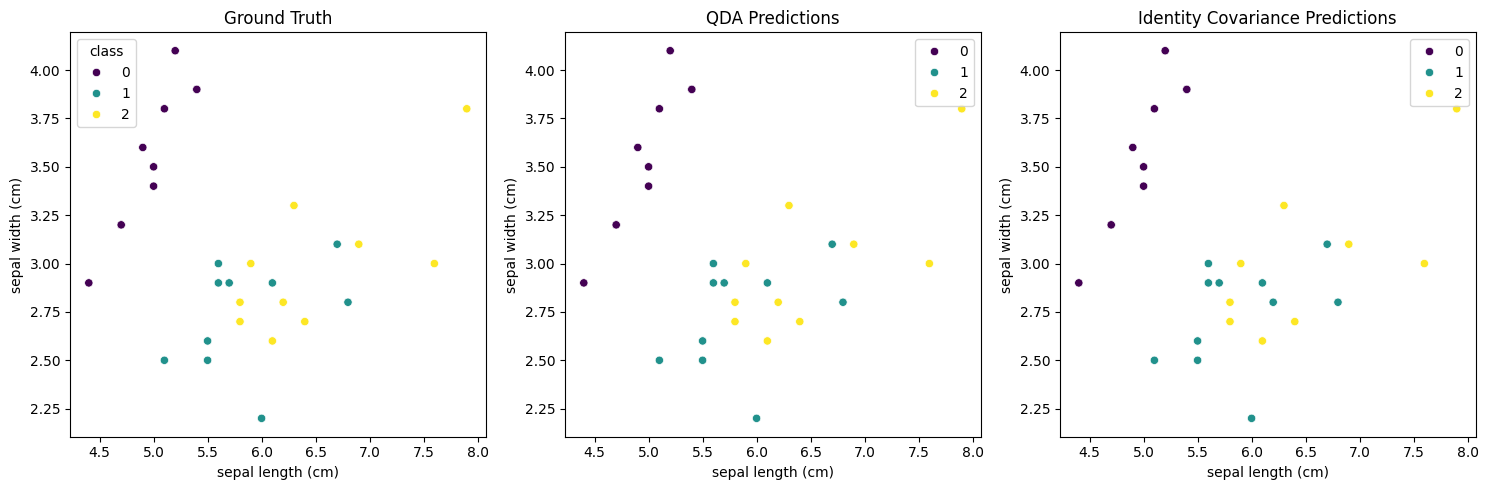


Final Results:
QDA Accuracy: 1.0000
Identity Covariance Accuracy: 0.9667


In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test, palette='viridis')
plt.title('Ground Truth')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test_pred_qda, palette='viridis')
plt.title('QDA Predictions')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test_pred_id, palette='viridis')
plt.title('Identity Covariance Predictions')

plt.tight_layout()
plt.show()

qda_accuracy = accuracy_score(y_test, y_test_pred_qda)
id_accuracy = accuracy_score(y_test, y_test_pred_id)

print(f"\nFinal Results:")
print(f"QDA Accuracy: {qda_accuracy:.4f}")
print(f"Identity Covariance Accuracy: {id_accuracy:.4f}")

<h1>Question-2</h1>

# Question 2: Nearest Centroid Classification

Implementation of a nearest centroid classifier using the formula: δk = -(||x - μk||²)/2

In [24]:
train_df = pd.read_csv('iris_remaining_40.csv')
test_df = pd.read_csv('iris_sample_10.csv')

target_column = train_df.columns[-1]

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,4.6,3.4,1.4,0.3,0


In [25]:
mean_vectors = X_train.groupby(y_train).mean()
print("Mean Vectors:")
print(mean_vectors)

Mean Vectors:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
class                                                           
0                 5.0125            3.3975             1.4625   
1                 5.9550            2.7775             4.2950   
2                 6.6125            2.9725             5.5625   

       petal width (cm)  
class                    
0                0.2425  
1                1.3400  
2                2.0300  


In [26]:
def predict_nearest_centroid(X, mean_vectors):
    predictions = []

    for index, x_point in X.iterrows():
        distances = []
        for class_label, mean_vec in mean_vectors.iterrows():
            dist = np.linalg.norm(x_point - mean_vec)
            distances.append(dist)

        predicted_class = mean_vectors.index[np.argmin(distances)]
        predictions.append(predicted_class)

    return np.array(predictions)

In [27]:
y_train_pred = predict_nearest_centroid(X_train, mean_vectors)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

y_test_pred = predict_nearest_centroid(X_test, mean_vectors)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Set Performance:
Accuracy: 0.9250

Test Set Performance:
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Test Set Performance:
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion 

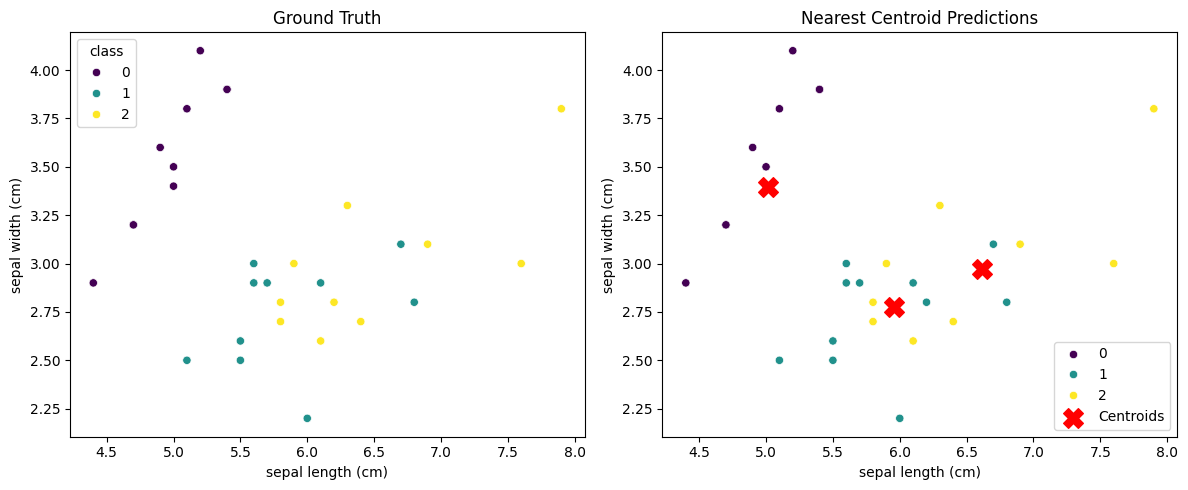

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test, palette='viridis')
plt.title('Ground Truth')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test_pred, palette='viridis')
plt.scatter(mean_vectors.iloc[:, 0], mean_vectors.iloc[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Nearest Centroid Predictions')
plt.legend()

plt.tight_layout()
plt.show()